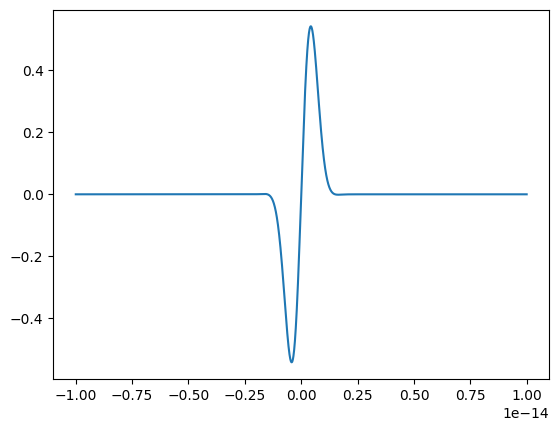

[-1.19848955e-87 -1.46552098e-87 -1.79163073e-87 ...  1.79163073e-87
  1.46552098e-87  1.19848955e-87]


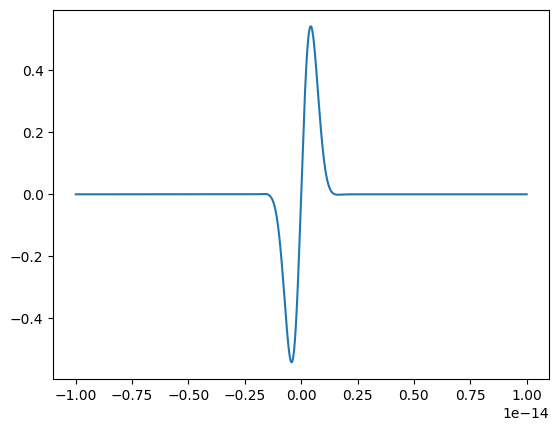

19
19
19
19
19
19
19
19
19
19
[-1.08705768e-86 -1.32595052e-86 -1.61698881e-86 ...  1.78069618e-87
  1.45656534e-87  1.19115633e-87]


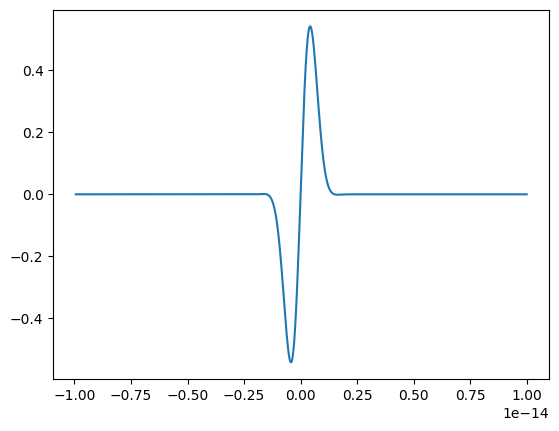

18
18
18
18
18
18
18
18
18
18
[-9.59943343e-86 -1.16814127e-85 -1.42119696e-85 ...  1.76982791e-87
  1.44766404e-87  1.18386767e-87]


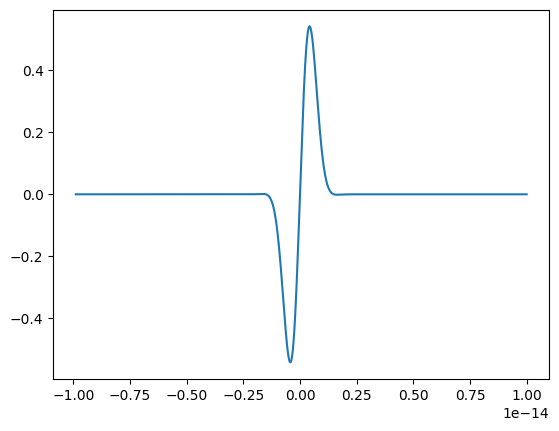

17
17
17
17
17
17
17
17
17
17
[-8.26314227e-85 -1.00324630e-84 -1.21781578e-84 ...  1.75902551e-87
  1.43881676e-87  1.17662329e-87]


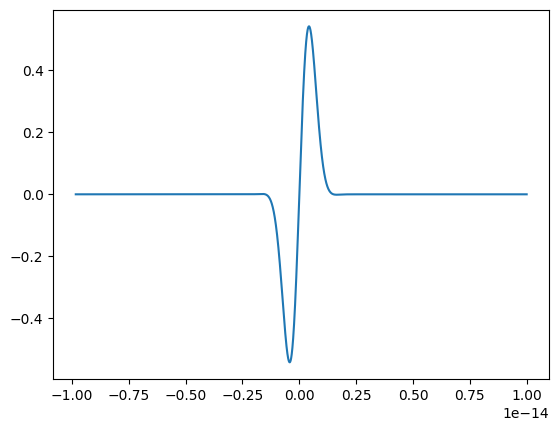

16
16
16
16
16
16
16
16
16
16
[-6.93875498e-84 -8.40577777e-84 -1.01809241e-83 ...  1.74828858e-87
  1.43002317e-87  1.16942293e-87]


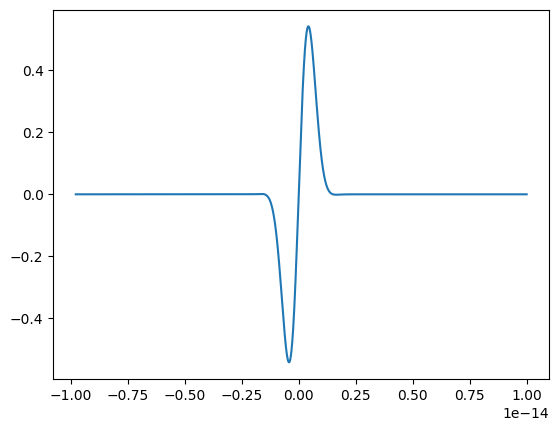

15
15
15
15
15
15
15
15
15
15
[-5.68618270e-83 -6.87319883e-83 -8.30634582e-83 ...  1.73761674e-87
  1.42128295e-87  1.16226633e-87]


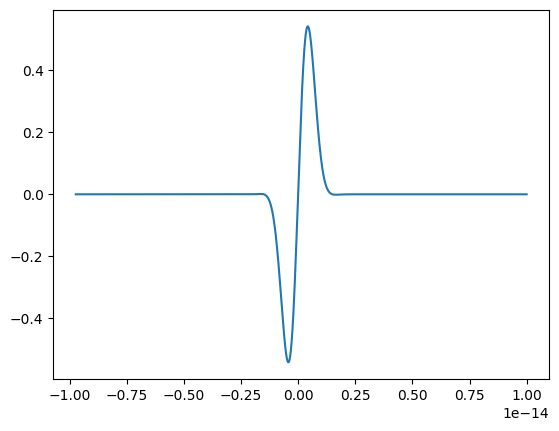

14
14
14
14
14
14
14
14
14
14
[-4.54761152e-82 -5.48476497e-82 -6.61370126e-82 ...  1.72700958e-87
  1.41259578e-87  1.15515322e-87]


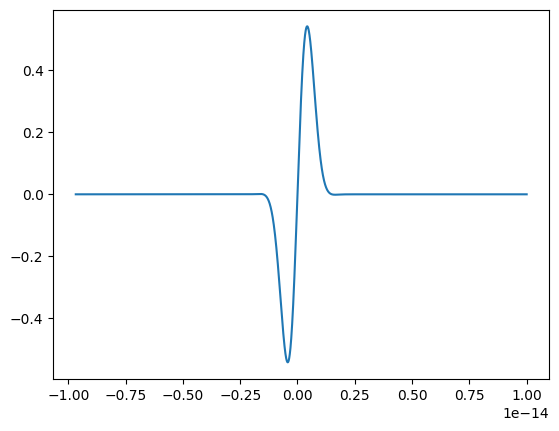

13
13
13
13
13
13
13
13
13
13
[-3.54850811e-81 -4.27010354e-81 -5.13736573e-81 ...  1.71646673e-87
  1.40396133e-87  1.14808333e-87]


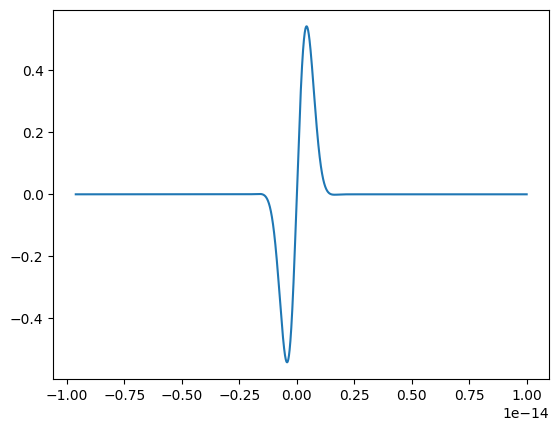

12
12
12
12
12
12
12
12
12
12
[-2.69977670e-80 -3.24118846e-80 -3.89032802e-80 ...  1.70598779e-87
  1.39537929e-87  1.14105641e-87]


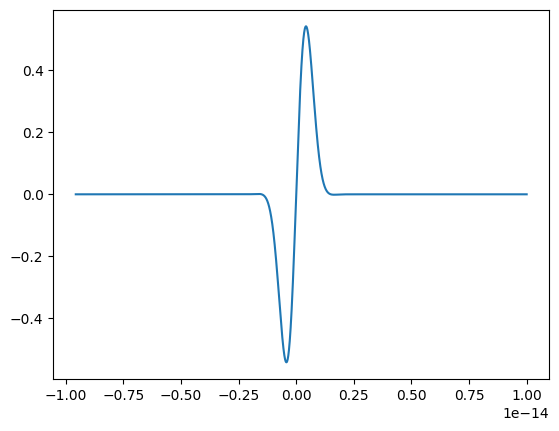

11
11
11
11
11
11
11
11
11
11
[-2.00060216e-79 -2.39589308e-79 -2.86862378e-79 ...  1.69557238e-87
  1.38684935e-87  1.13407220e-87]


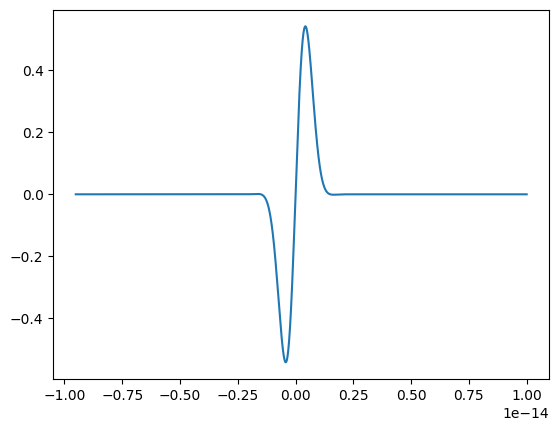

10
10
10
10
10
10
10
10
10
10
[-1.44154861e-78 -1.72181370e-78 -2.05604941e-78 ...  1.68522011e-87
  1.37837119e-87  1.12713043e-87]


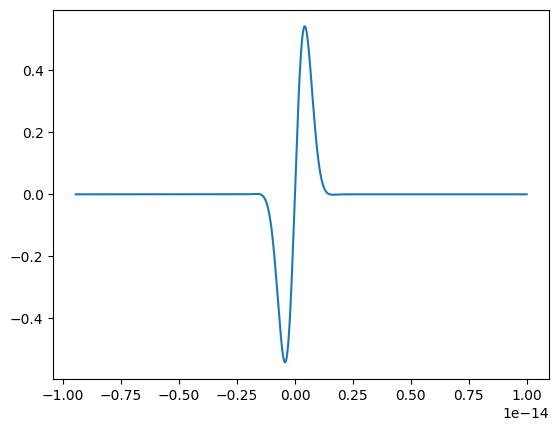

9
9
9
9
9
9
9
9
9
9
[-1.00755986e-77 -1.19993857e-77 -1.42864505e-77 ...  1.67493061e-87
  1.36994449e-87  1.12023086e-87]


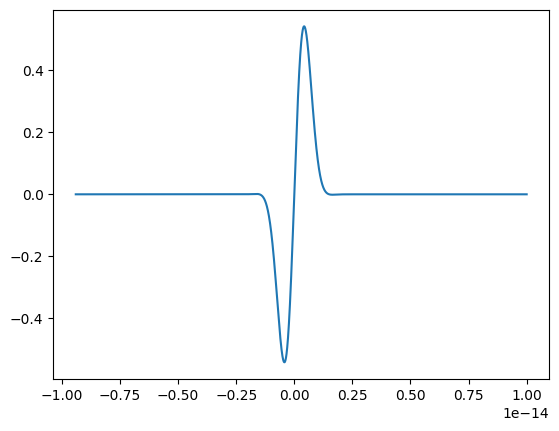

8
8
8
8
8
8
8
8
8
8
[-6.80607289e-77 -8.07860258e-77 -9.58589162e-77 ...  1.66470350e-87
  1.36156895e-87  1.11337323e-87]


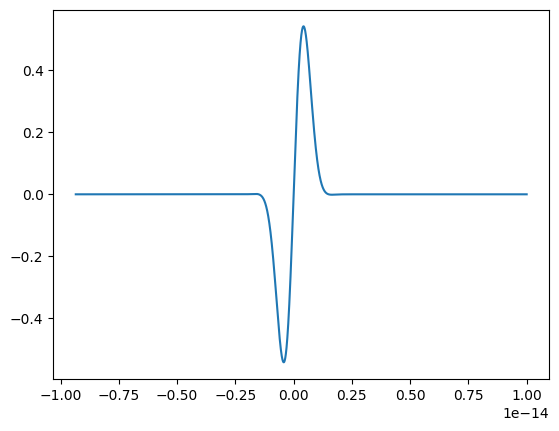

7
7
7
7
7
7
7
7
7
7
[-4.41834389e-76 -5.22356963e-76 -6.17303276e-76 ...  1.65453840e-87
  1.35324426e-87  1.10655728e-87]


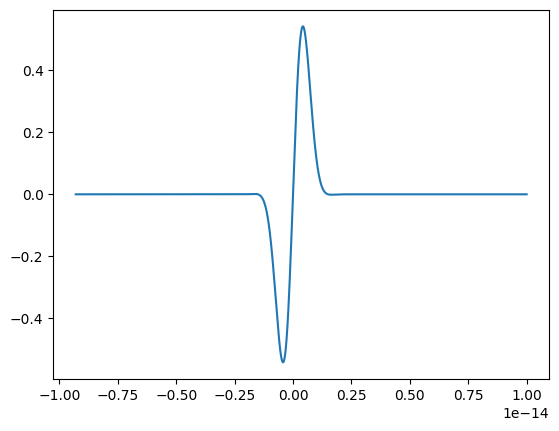

6
6
6
6
6
6
6
6
6
6
[-2.73140881e-75 -3.21281868e-75 -3.77703086e-75 ...  1.64443494e-87
  1.34497011e-87  1.09978277e-87]


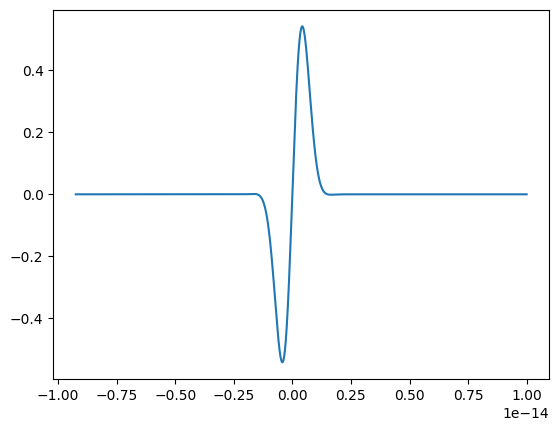

5
5
5
5
5
5
5
5
5
5
[-1.58223780e-74 -1.84788725e-74 -2.15639127e-74 ...  1.63439275e-87
  1.33674620e-87  1.09304944e-87]


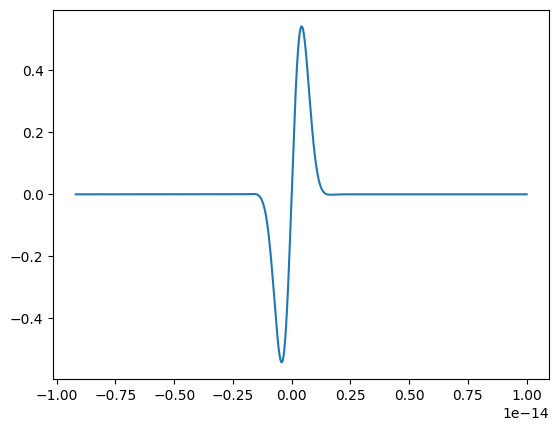

4
4
4
4
4
4
4
4
4
4
[-8.31439535e-74 -9.59825552e-74 -1.10641356e-73 ...  1.62441146e-87
  1.32857222e-87  1.08635704e-87]


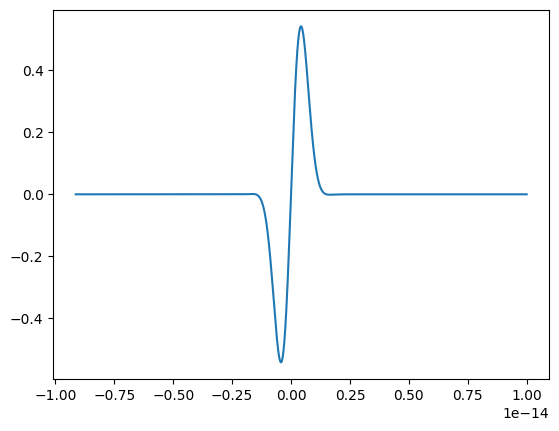

3
3
3
3
3
3
3
3
3
3
[-3.65149553e-73 -4.11165412e-73 -4.61189923e-73 ...  1.61449069e-87
  1.32044788e-87  1.07970533e-87]


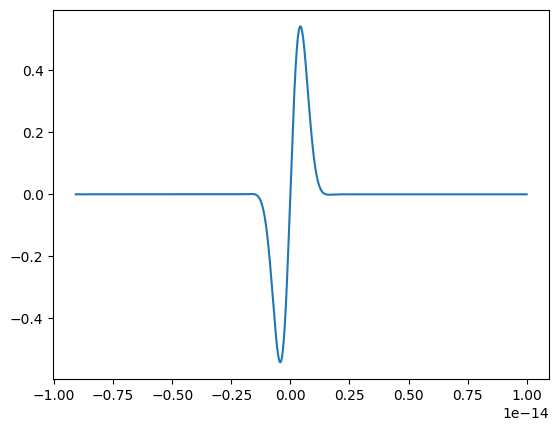

2
2
2
2
2
2
2
2
2
2
[-9.41945674e-73 -9.46485972e-73 -9.17524694e-73 ...  1.60463010e-87
  1.31237286e-87  1.07309406e-87]


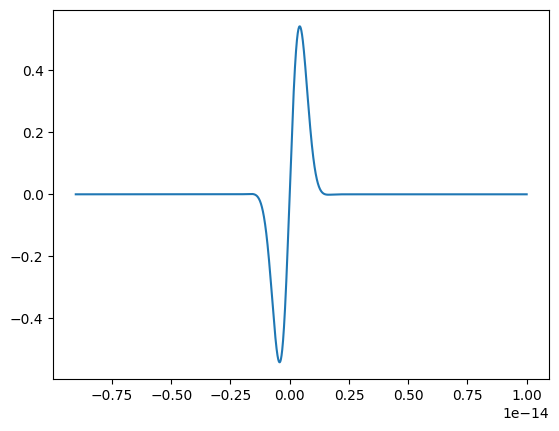

1
1
1
1
1
1
1
1
1
1
[4.84759097e-72 7.00773086e-72 9.81596283e-72 ... 1.59482931e-87
 1.30434689e-87 1.06652300e-87]


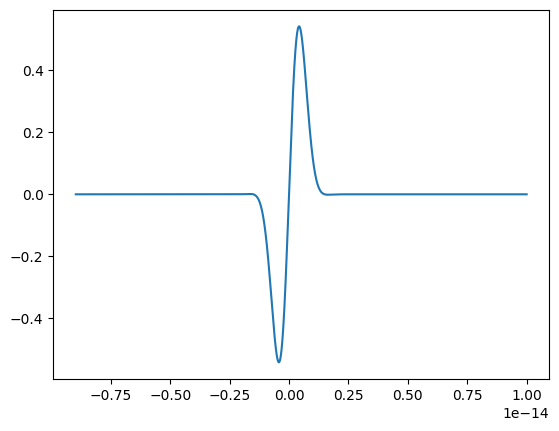

0
0
0
0
0
0
0
0
0
0


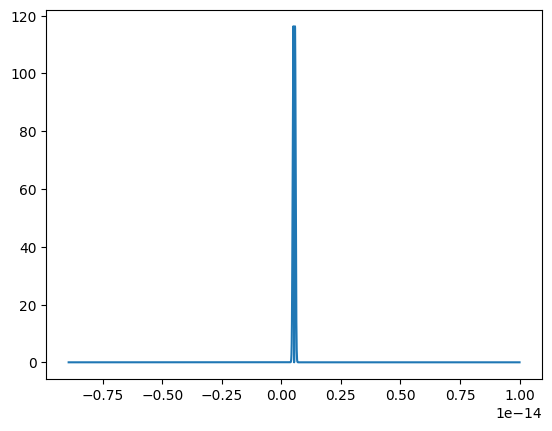

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import *

c = 3e+8
l0 = 900e-9
dots = 2**12
time_ = 80e-12
tau = 10e-16
w_0 = 2 * np.pi * c / l0
h_cr = 0.005 / 20

t = np.linspace(-tau * 10, tau *10, dots)

def gauss(t_):
    ans = np.exp(-2 * (t/tau) ** 2) * np.sin(w_0 * t_)
    return ans
plt.plot(t, gauss(t))
plt.show()

def crank(E_, steps):
    steps-=1
    print(E_)
    E_h = E_[1:] + h_cr * np.diff(E_) * 10
    E_hk = 0
    plt.plot(t[len(t)-len(E_h):], E_h)
    plt.show() 
    # while not (abs(E_hk - E_h) < 1e-4).all():
    for i in range(10):
 
        print(steps)
        E_h2 = 1/2 * (E_[len(E_)-len(E_h):] + E_h)
        E_hk = E_h[1:] + h_cr * np.diff(E_h2) * 10
        
        E_h = E_hk
    if steps == 0:
        return E_hk
    return crank(E_hk, steps)
E_in = gauss(t)
E0_t = crank(E_in, 20)


E_out = fftshift(fft(E0_t))
plt.plot(t[len(t)-len(E_out):], abs(E_out))
plt.show()
    

In [6]:

def func(ans, steps):
    steps-= 1
    ans +=1
    if steps == 0:
        return ans
    return func(ans, steps)

print(func(5, 100))

105
